In [4]:
#Defining the model 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.optimizers import SGD,Adam,RMSprop
#fitting the model and predicting 
from keras.utils import to_categorical

import numpy as np # linear algebra
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

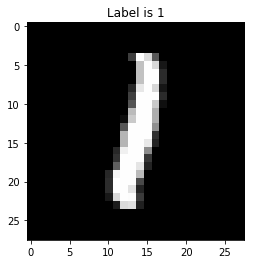

In [12]:
n = random.randint(0, x_train.shape[0]-1)
plt.title('Label is {label}'.format(label=y_train[n]))
plt.imshow(x_train[n], cmap='gray')
plt.show()

In [13]:
model = Sequential()

#sigmoid, tanh, softmax, ReLU, Leaky ReLU
model.add(Dense(28, activation='sigmoid', input_shape=(28, 28)))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(int(28*28/4), activation='sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

model.compile(RMSprop(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28)            812       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               153860    
_________________________________________________________________
dropout_2 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1970      
Total params: 156,642
Trainable params: 156,642
Non-trainable params: 0
_________________________________________________________________


In [14]:
def aprender(x_train, y_train):
    model.fit(x_train,to_categorical(y_train),epochs=5,validation_split=0.05,batch_size=64)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
aprender(x_train, y_train)

Train on 57000 samples, validate on 3000 samples
Epoch 1/5
57000/57000 [==============================] - 36s 634us/step - loss: 0.4861 - acc: 0.8556 - val_loss: 0.1830 - val_acc: 0.9520
Epoch 2/5
57000/57000 [==============================] - 34s 590us/step - loss: 0.2412 - acc: 0.9244 - val_loss: 0.1490 - val_acc: 0.9557
Epoch 3/5
57000/57000 [==============================] - 35s 617us/step - loss: 0.1865 - acc: 0.9410 - val_loss: 0.1082 - val_acc: 0.9687
Epoch 4/5
57000/57000 [==============================] - 35s 619us/step - loss: 0.1561 - acc: 0.9521 - val_loss: 0.1035 - val_acc: 0.9750
Epoch 5/5
57000/57000 [==============================] - 34s 601us/step - loss: 0.1329 - acc: 0.9577 - val_loss: 0.0851 - val_acc: 0.9760


In [17]:
to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
y_pred = model.predict(x_test)
y_pred[0]

array([7.1540969e-09, 1.4708408e-07, 4.1640673e-05, 2.3065304e-05,
       7.6303884e-08, 1.9672445e-06, 1.3300870e-11, 9.9992013e-01,
       2.0169793e-08, 1.2967295e-05], dtype=float32)

In [21]:
y_test_class = y_test #np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Prediccion: 5


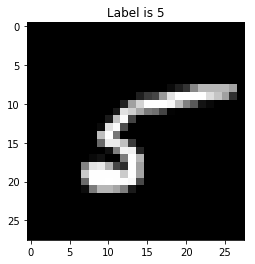

In [23]:
n = random.randint(1, y_test_class.shape[0]) - 1
y_pred = model.predict(x_test[n:n+1])
print("Prediccion: {}".format(np.argmax(y_pred,axis=1)[0]))
plt.title('Label is {label}'.format(label=y_test[n]))
plt.imshow(x_test[n], cmap='gray')
plt.show()

In [24]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.95      0.98      0.97      1032
          3       0.96      0.97      0.97      1010
          4       0.98      0.95      0.96       982
          5       0.97      0.97      0.97       892
          6       0.98      0.97      0.98       958
          7       0.98      0.93      0.95      1028
          8       0.96      0.97      0.96       974
          9       0.93      0.96      0.94      1009

avg / total       0.97      0.97      0.97     10000

[[ 973    0    2    1    0    0    1    1    2    0]
 [   0 1119    4    3    1    1    2    0    5    0]
 [   1    0 1013    2    1    0    0    6    8    1]
 [   0    0    9  978    0    8    0    6    6    3]
 [   3    2    2    3  930    0    5    1    2   34]
 [   5    0    1    6    3  862    7    1    6    1]
 [   7    2    4    0    3    5  933    0  